In [6]:
#!pip install yfinance
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

# Data Collection

In [2]:
# Data Collection
warnings.filterwarnings('ignore')
tickers=['AAPL','MSFT','GOOGL','AMZN','TSLA']
data={ticker:yf.download(ticker,period='1y') for ticker in tickers}

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


# 1. Data Preparation:

In [10]:
# Data Preparation

def clean_data(df):
    df = df.copy()  # Avoid modifying original data
    df.dropna(inplace=True)  # Remove missing values
    df = df[df > 0]  # Remove negative or zero prices (corrupt data)
    return df

cleaned_data = {ticker: clean_data(df) for ticker, df in data.items()}


# 2. Exploratory Data Analysis (EDA):

In [12]:
# Exploratory Data Analysis

# Step 1: Summary Statistics
# Display summary statistics for each stock
for ticker, df in cleaned_data.items():
    print(f"\nSummary Statistics for {ticker}:")
    print()
    print(df.describe())


Summary Statistics for AAPL:

Price        Close        High         Low        Open        Volume
Ticker        AAPL        AAPL        AAPL        AAPL          AAPL
count   250.000000  250.000000  250.000000  250.000000  2.500000e+02
mean    217.733153  219.735418  215.446490  217.478133  5.538131e+07
std      23.698061   23.843097   23.304666   23.650546  3.036794e+07
min     164.224548  165.617963  163.308874  164.572913  2.323470e+07
25%     209.257889  213.492477  207.966055  209.961835  4.047068e+07
50%     224.504593  226.366475  222.522789  224.464611  4.822680e+07
75%     232.820576  234.570783  229.482695  232.752745  6.041002e+07
max     258.735504  259.814335  257.347047  257.906429  3.186799e+08

Summary Statistics for MSFT:

Price        Close        High         Low        Open        Volume
Ticker        MSFT        MSFT        MSFT        MSFT          MSFT
count   250.000000  250.000000  250.000000  250.000000  2.500000e+02
mean    420.156811  423.673314  416.41666

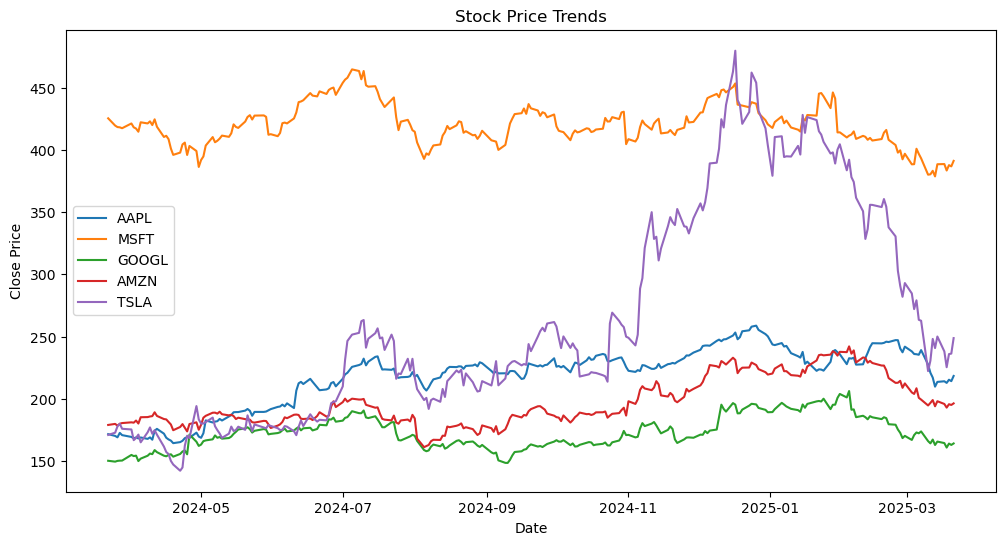

In [21]:
#Step 2: Price Trends Over Time

plt.figure(figsize=(12, 6))
for ticker, df in cleaned_data.items():
    plt.plot(df.index, df['Close'], label=ticker)

plt.title('Stock Price Trends')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

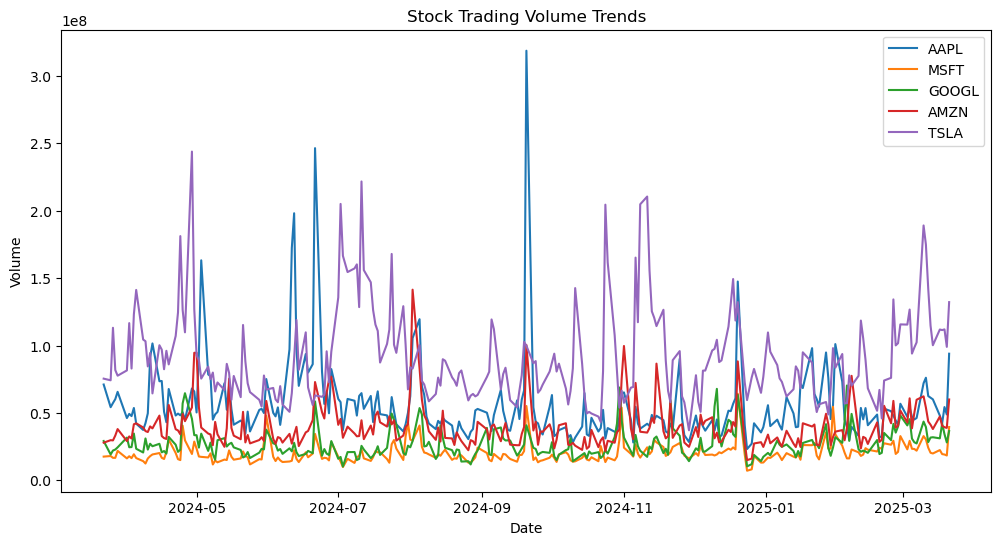

In [23]:
# Step 3: Volume Trends Over Time

plt.figure(figsize=(12, 6))
for ticker, df in cleaned_data.items():
    plt.plot(df.index, df['Volume'], label=ticker)

plt.title('Stock Trading Volume Trends')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

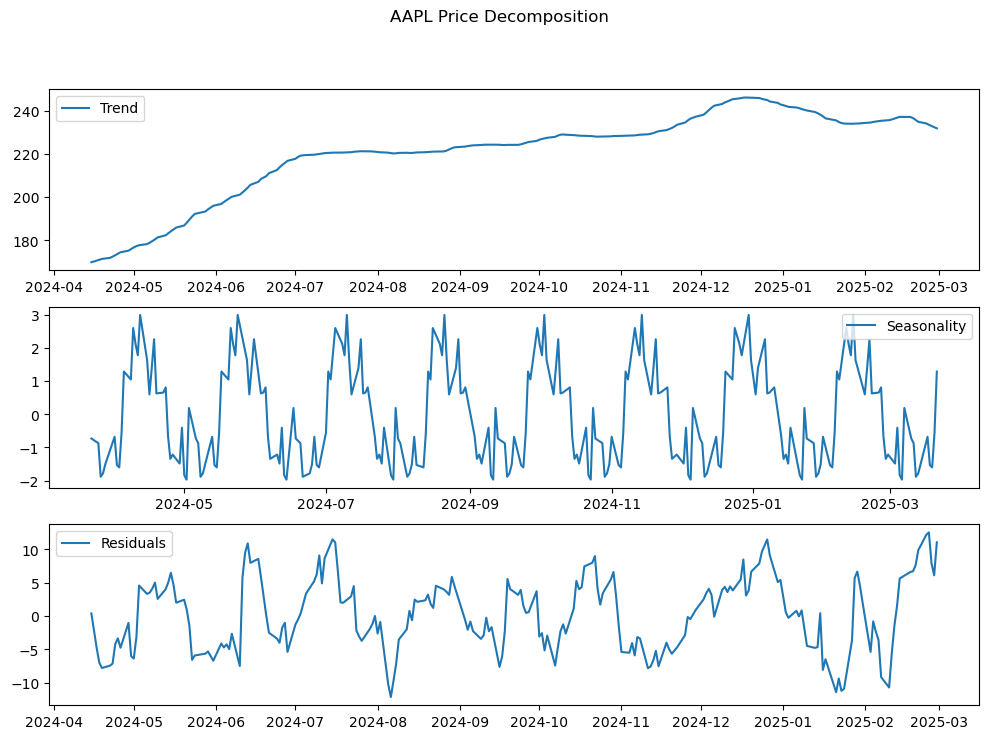

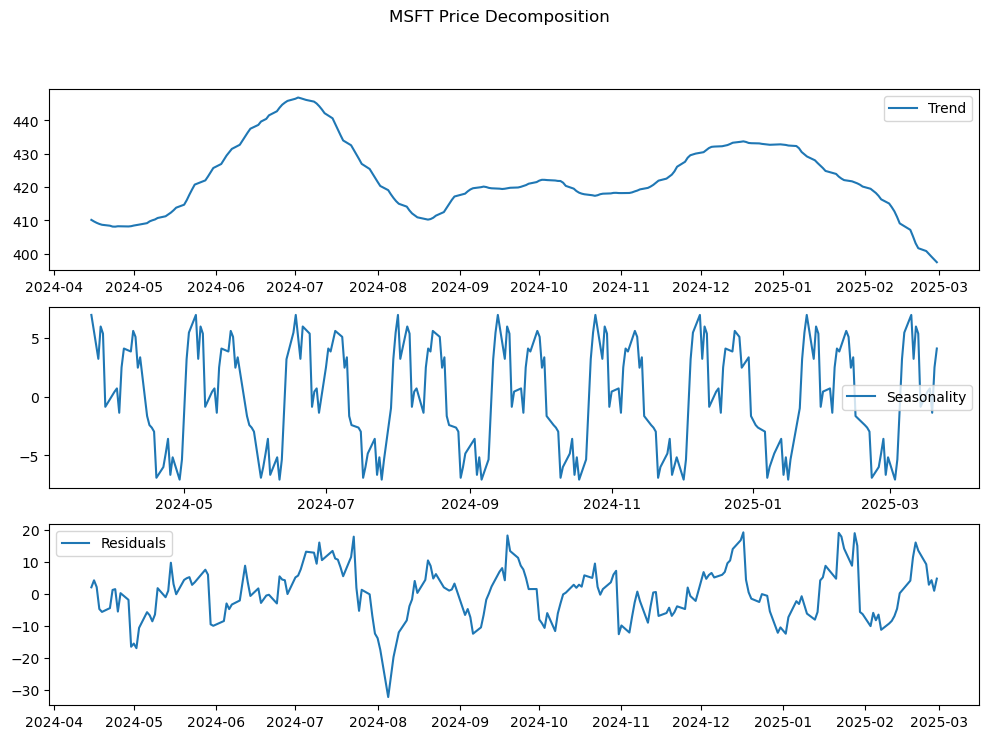

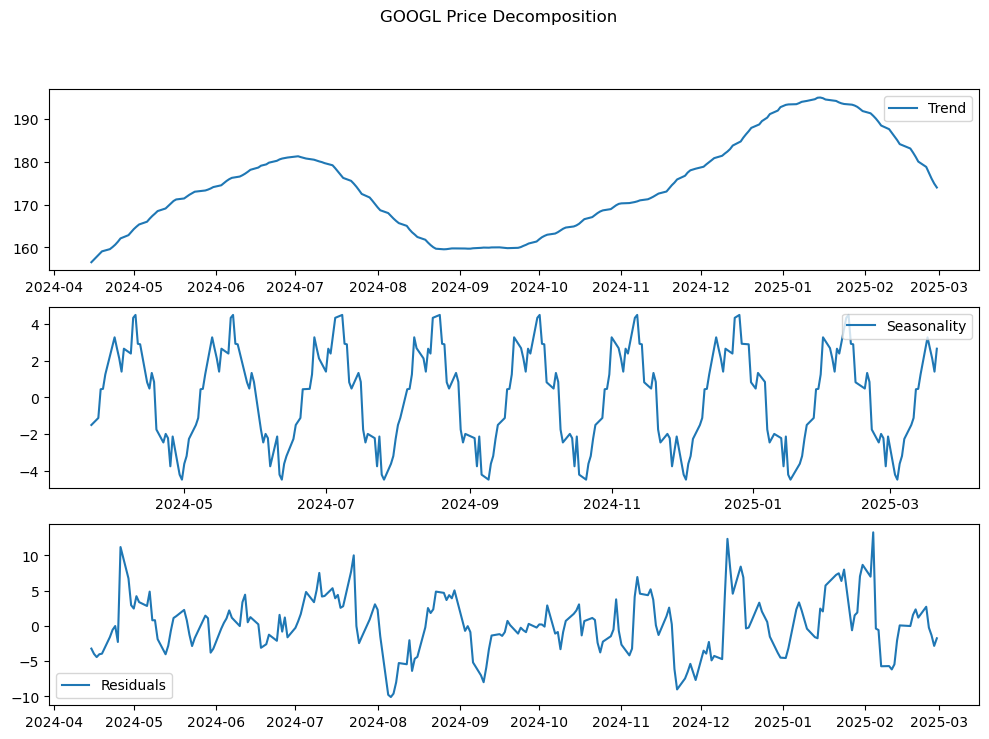

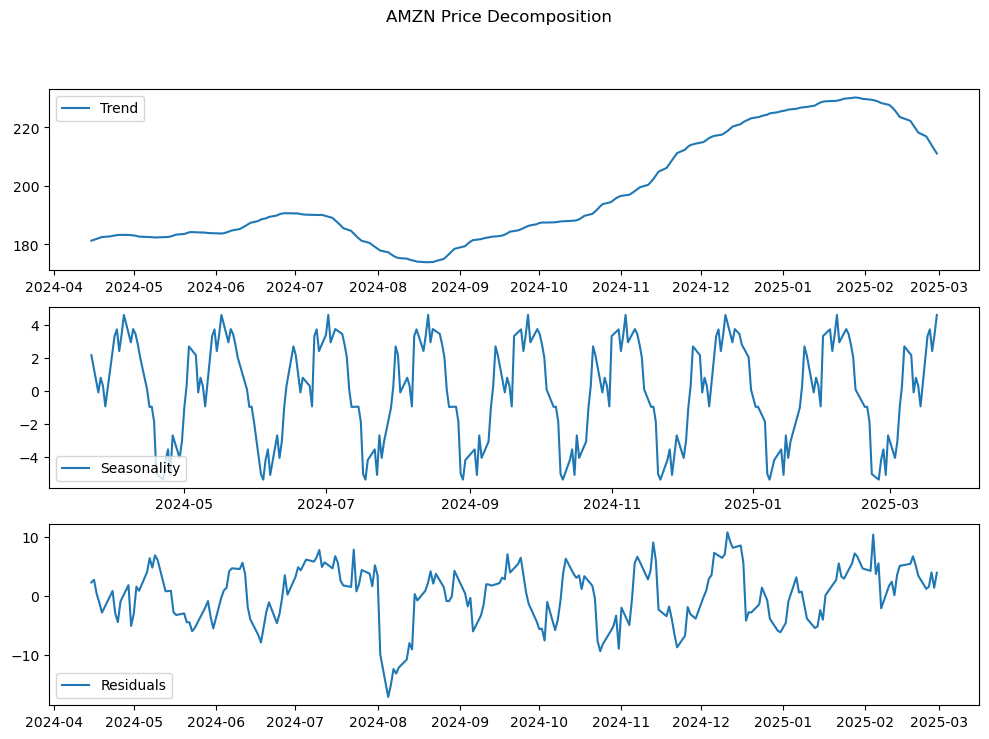

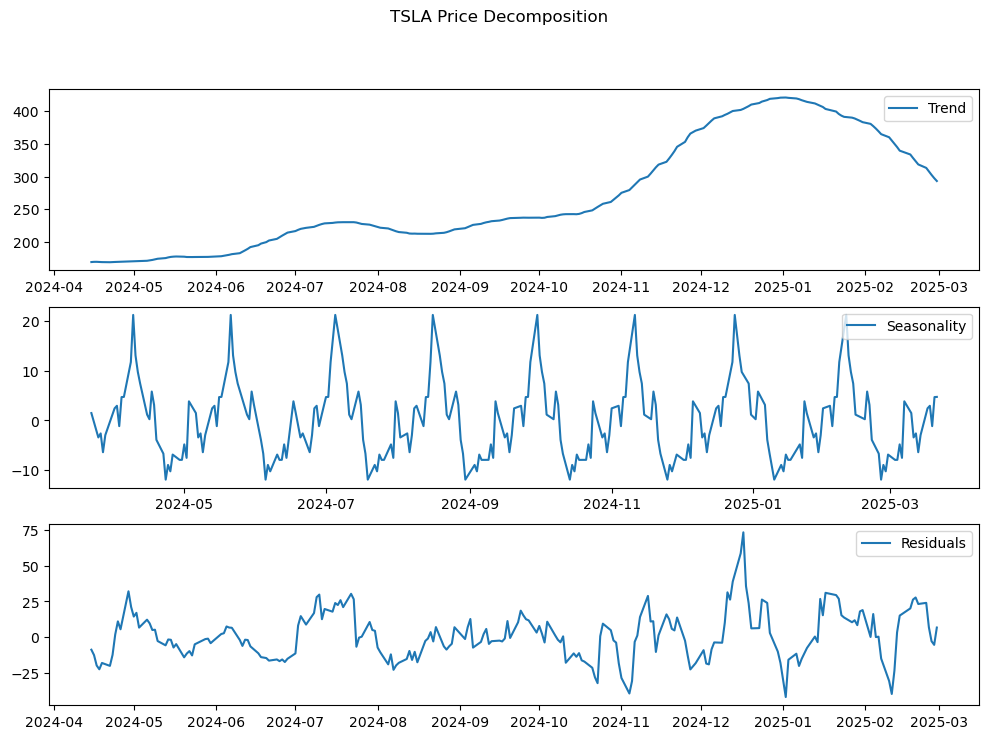

In [24]:
# Step 4: Seasonality & Trends (Decomposition)

from statsmodels.tsa.seasonal import seasonal_decompose

for ticker, df in cleaned_data.items():
    decomposition = seasonal_decompose(df['Close'], model='additive', period=30)
    plt.figure(figsize=(12, 8))

    plt.subplot(3, 1, 1)
    plt.plot(decomposition.trend, label='Trend')
    plt.legend()

    plt.subplot(3, 1, 2)
    plt.plot(decomposition.seasonal, label='Seasonality')
    plt.legend()

    plt.subplot(3, 1, 3)
    plt.plot(decomposition.resid, label='Residuals')
    plt.legend()

    plt.suptitle(f'{ticker} Price Decomposition')
    plt.show()

In [26]:
# Step 5: ADF & KPSS Tests for Stationarity

warnings.filterwarnings('ignore')
from statsmodels.tsa.stattools import adfuller, kpss

def adf_test(series):
    result = adfuller(series, autolag='AIC')
    print(f"ADF Test: p-value = {result[1]:.4f}")
    if result[1] <= 0.05:
        print("✅ The series is likely stationary.")
    else:
        print("❌ The series is likely non-stationary.")

def kpss_test(series):
    result = kpss(series, regression='c', nlags='auto')
    print(f"KPSS Test: p-value = {result[1]:.4f}")
    if result[1] >= 0.05:
        print("✅ The series is likely stationary.")
    else:
        print("❌ The series is likely non-stationary.")


for ticker, df in cleaned_data.items():
    print(f"\n📊 Stationarity Tests for {ticker}")

    # Use 'Close' prices (or 'Adj Close' if available)
    series = df['Close'].dropna()

    print("\nADF Test Results:")
    adf_test(series)

    print("\nKPSS Test Results:")
    kpss_test(series)

    print("-" * 50)


📊 Stationarity Tests for AAPL

ADF Test Results:
ADF Test: p-value = 0.2957
❌ The series is likely non-stationary.

KPSS Test Results:
KPSS Test: p-value = 0.0100
❌ The series is likely non-stationary.
--------------------------------------------------

📊 Stationarity Tests for MSFT

ADF Test Results:
ADF Test: p-value = 0.1386
❌ The series is likely non-stationary.

KPSS Test Results:
KPSS Test: p-value = 0.1000
✅ The series is likely stationary.
--------------------------------------------------

📊 Stationarity Tests for GOOGL

ADF Test Results:
ADF Test: p-value = 0.1855
❌ The series is likely non-stationary.

KPSS Test Results:
KPSS Test: p-value = 0.0143
❌ The series is likely non-stationary.
--------------------------------------------------

📊 Stationarity Tests for AMZN

ADF Test Results:
ADF Test: p-value = 0.5035
❌ The series is likely non-stationary.

KPSS Test Results:
KPSS Test: p-value = 0.0100
❌ The series is likely non-stationary.
--------------------------------------

In [34]:
# Apply first-order differencing

def difference_series(series):
    return series.diff().dropna()

# Re-run stationarity tests

for ticker, df in cleaned_data.items():
    print(f"\n📊 Stationarity Tests for {ticker} (After First-Order Differencing)")

    # Apply differencing on 'Close' prices
    series_diff = difference_series(df['Close'])

    print("\nADF Test Results:")
    adf_test(series_diff)

    print("\nKPSS Test Results:")
    kpss_test(series_diff)

    print("-" * 50)
    
# Apply first-order differencing and store results
differenced_data = {ticker: df['Close'].diff().dropna() for ticker, df in cleaned_data.items()}


📊 Stationarity Tests for AAPL (After First-Order Differencing)

ADF Test Results:
ADF Test: p-value = 0.0000
✅ The series is likely stationary.

KPSS Test Results:
KPSS Test: p-value = 0.1000
✅ The series is likely stationary.
--------------------------------------------------

📊 Stationarity Tests for MSFT (After First-Order Differencing)

ADF Test Results:
ADF Test: p-value = 0.0000
✅ The series is likely stationary.

KPSS Test Results:
KPSS Test: p-value = 0.1000
✅ The series is likely stationary.
--------------------------------------------------

📊 Stationarity Tests for GOOGL (After First-Order Differencing)

ADF Test Results:
ADF Test: p-value = 0.0000
✅ The series is likely stationary.

KPSS Test Results:
KPSS Test: p-value = 0.1000
✅ The series is likely stationary.
--------------------------------------------------

📊 Stationarity Tests for AMZN (After First-Order Differencing)

ADF Test Results:
ADF Test: p-value = 0.0000
✅ The series is likely stationary.

KPSS Test Result

In [96]:
for ticker in cleaned_data.keys():
    cleaned_data[ticker]['Close'] = differenced_data[ticker]

# 3. Feature Engineering:

In [101]:
def create_features(df):
    df = df.copy()

    # Lagged Features (1-day lag)
    df['Lag_1'] = df['Close'].shift(1)

    # Rolling Window Features (5-day moving average and standard deviation)
    df['Rolling_Mean'] = df['Close'].rolling(window=5).mean()
    df['Rolling_Std'] = df['Close'].rolling(window=5).std()

    # Percentage Change (Daily Returns)
    df['Pct_Change'] = df['Close'].pct_change()

    # Drop missing values caused by rolling window
    df.dropna(inplace=True)

    return df


feature_data = {ticker: create_features(df) for ticker, df in cleaned_data.items()}

In [102]:
feature_data

{'AAPL': Price          Close        High         Low        Open    Volume     Lag_1  \
 Ticker          AAPL        AAPL        AAPL        AAPL      AAPL             
 Date                                                                           
 2024-04-01 -1.443176  170.445194  168.683508  170.385479  46240500 -1.821396   
 2024-04-02 -1.184433  168.544144  167.439360  168.285371  49329500 -1.443176   
 2024-04-03  0.806198  169.877850  167.787728  167.996733  47691700 -1.184433   
 2024-04-04 -0.826080  171.112033  168.026611  169.489689  53704400  0.806198   
 2024-04-05  0.756424  169.589226  168.155991  168.792983  42055200 -0.826080   
 ...              ...         ...         ...         ...       ...       ...   
 2025-03-17  0.509995  215.220001  209.970001  213.309998  48073400  3.810013   
 2025-03-18 -1.309998  215.149994  211.490005  214.160004  42432400  0.509995   
 2025-03-19  2.550003  218.759995  213.750000  214.220001  54385400 -1.309998   
 2025-03-20 -1.13999

# 4. Modeling:

# ○ ARIMA Model:

In [53]:
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima.model import ARIMA  
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings

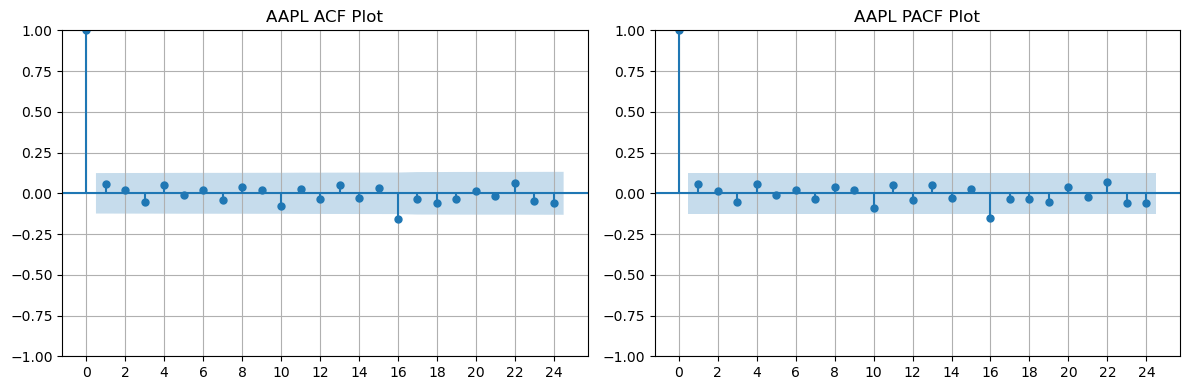

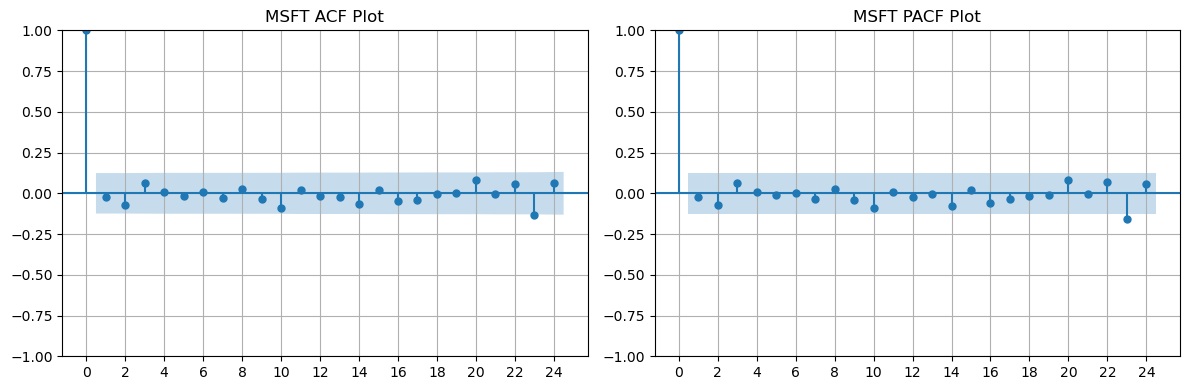

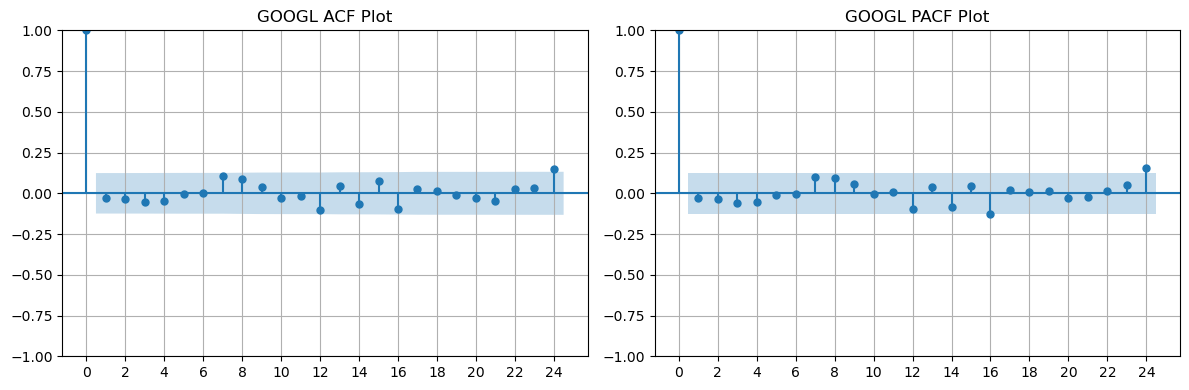

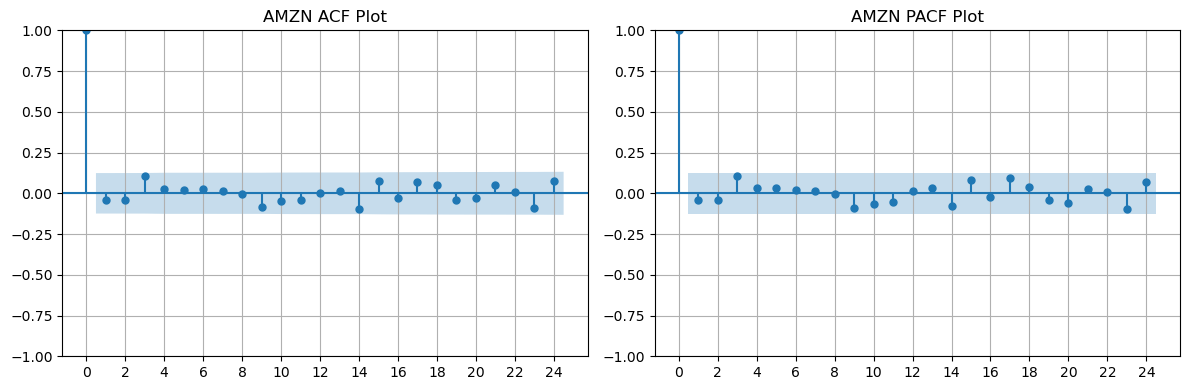

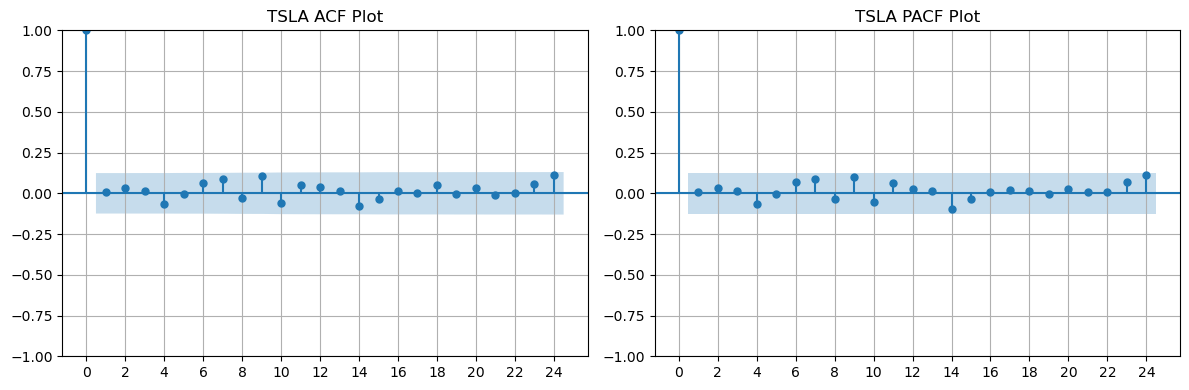

In [80]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF & PACF for all stocks
for ticker, df in differenced_data.items():
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # ACF Plot
    plot_acf(df, ax=axes[0])  
    axes[0].set_title(f'{ticker} ACF Plot')
    axes[0].set_xticks(range(0, 26, 2))  # Set xticks every 2 lags
    axes[0].grid(True)  # Add grid

    # PACF Plot
    plot_pacf(df, ax=axes[1])  
    axes[1].set_title(f'{ticker} PACF Plot')
    axes[1].set_xticks(range(0, 26, 2))  # Set xticks every 2 lags
    axes[1].grid(True)  # Add grid

    plt.tight_layout()
    plt.show()

In [73]:
def grid_search_arima(df):
    best_aic = float("inf")
    best_order = None
    best_model = None
    
    for p in range(17):
        for d in range(3):
            for q in range(17):
                try:
                    model = ARIMA(df['Close'], order=(p, d, q))
                    model_fit = model.fit()
                    aic = model_fit.aic
                    
                    if aic < best_aic:
                        best_aic = aic
                        best_order = (p, d, q)
                        best_model = model_fit
                except:
                    continue
    
    return best_model, best_order

# Run Grid Search for AAPL
best_model_apple, best_order_apple = grid_search_arima(feature_data['AAPL'])
print(f"Best ARIMA Order for TSLA: {best_order_apple}")

Best ARIMA Order for TSLA: (7, 1, 12)


MAE: 3.1521
RMSE: 4.1892
R2 SCORE: 0.0552


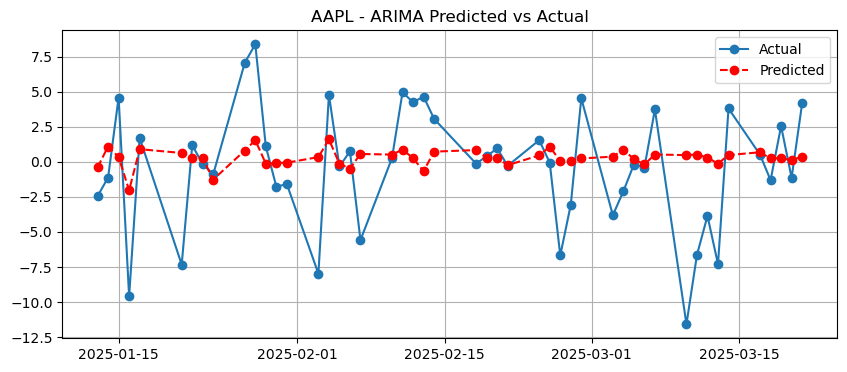

In [136]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# Load AAPL data
df = feature_data

# Train-test split (80% train, 20% test)
train, test = train_test_split(df, test_size=0.2, shuffle=False)

# Function to train ARIMA model and predict
def train_arima(train, test, order=(7,1,12)):  
    model = ARIMA(train['Close'], order=order)
    model_fit = model.fit()
    
    forecast = model_fit.forecast(steps=len(test))  # Predict test set
    return model_fit, forecast, test

# Train ARIMA for AAPL
arima_model, arima_predictions, test_data = train_arima(train, test, order=(7,1,12))

# Calculate evaluation metrics
mae = mean_absolute_error(test_data['Close'], arima_predictions)
rmse = np.sqrt(mean_squared_error(test_data['Close'], arima_predictions))
r2=r2 = r2_score(y_test, arima_predictions)

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R2 SCORE: {r2:.4f}")

# Plot Actual vs Predicted
plt.figure(figsize=(10, 4))
plt.plot(test_data.index, test_data['Close'], label="Actual", marker='o')
plt.plot(test_data.index, arima_predictions, label="Predicted", marker='o', linestyle='dashed', color='red')

plt.title("AAPL - ARIMA Predicted vs Actual")
plt.legend()
plt.grid(True)
plt.show()

# ○  XGBoost:

In [77]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/5e/03/15cd49e855c62226ecf1831bbe4c8e73a4324856077a23c495538a36e557/xgboost-3.0.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.6/150.0 MB 18.5 MB/s eta 0:00:09
   ---------------------------------------- 0.8/150.0 MB 8.2 MB/s eta 0:00:19
   ---------------------------------------- 1.0/150.0 MB 6.7 MB/s eta 0:00:23
   ---------------------------------------- 1.1/150.0 MB 6.0 MB/s eta 0:00:25
   ---------------------------------------- 1.3/150.0 MB 6.0 MB/s eta 0:00:25
   ---------------------------------------- 1.5/150.0 MB 5.3 MB/s eta 0:00:28
   ---------------------------------------- 1.7/150.0 MB 5.1 MB/s eta 0:00:29
   ---------------------------------------- 1.9/150.0 MB 5.2 MB/s eta 0:00:29
    --------------------------------------- 2.1/150.0 MB 4.9 MB/s eta 0:00:31
    -----------------

AAPL - XGBoost MAE: 3.1145, RMSE: 3.9580


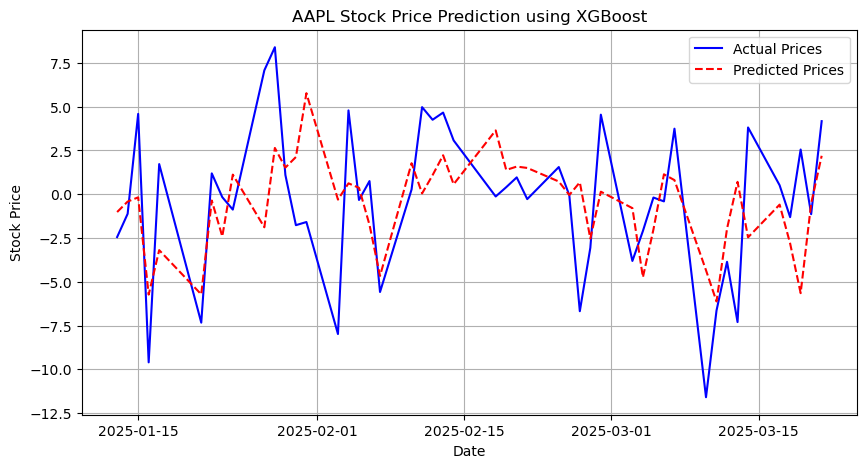

In [90]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Feature Engineering Function
def create_xgb_features(df):
    df = df.copy()
    
    # Create Lagged Returns (1-day, 2-day, and 3-day lags)
    df['Lag_1'] = df['Close'].shift(1)
    df['Lag_2'] = df['Close'].shift(2)
    df['Lag_3'] = df['Close'].shift(3)
    
    # Moving Averages
    df['MA_5'] = df['Close'].rolling(window=5).mean()
    df['MA_10'] = df['Close'].rolling(window=10).mean()
    
    # Volume Change
    df['Volume_Change'] = df['Volume'].pct_change()

    # Drop NaN values created due to shifting
    df.dropna(inplace=True)
    
    return df

# Apply feature engineering for TSLA only
feature_data = create_xgb_features(cleaned_data['AAPL'])

# Prepare Input (X) and Target (y)
X = feature_data[['Lag_1', 'Lag_2', 'Lag_3', 'MA_5', 'MA_10', 'Volume_Change']]
y = feature_data['Close']

# Split data into Training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False,random_state=45)

# Convert data into XGBoost DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define XGBoost Parameters
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 100
}

# Train XGBoost Model
xgb_model = xgb.train(params, dtrain, num_boost_round=100)

# Make Predictions
y_pred = xgb_model.predict(dtest)

# Evaluate Model Performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"AAPL - XGBoost MAE: {mae:.4f}, RMSE: {rmse:.4f}")

# Plot Actual vs Predicted Prices
plt.figure(figsize=(10, 5))
plt.plot(y_test.index, y_test, label='Actual Prices', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Prices', color='red', linestyle='dashed')
plt.legend()
plt.title("AAPL Stock Price Prediction using XGBoost")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.grid(True)
plt.show()

In [88]:
pip install optuna

  Obtaining dependency information for optuna from https://files.pythonhosted.org/packages/28/09/c4d329f7969443cdd4d482048ca406b6f61cda3c8e99ace71feaec7c8734/optuna-4.2.1-py3-none-any.whl.metadata
  Obtaining dependency information for alembic>=1.5.0 from https://files.pythonhosted.org/packages/99/f7/d398fae160568472ddce0b3fde9c4581afc593019a6adc91006a66406991/alembic-1.15.1-py3-none-any.whl.metadata
  Obtaining dependency information for colorlog from https://files.pythonhosted.org/packages/e3/51/9b208e85196941db2f0654ad0357ca6388ab3ed67efdbfc799f35d1f83aa/colorlog-6.9.0-py3-none-any.whl.metadata
  Obtaining dependency information for Mako from https://files.pythonhosted.org/packages/cd/83/de0a49e7de540513f53ab5d2e105321dedeb08a8f5850f0208decf4390ec/Mako-1.3.9-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/383.6 kB ? eta -:--:--
   --------------------------------------- 383.6/383.6 kB 12.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/231

In [117]:
# Hyperparameter Tunning 

import optuna
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Feature Engineering Function
def create_xgb_features(df):
    df = df.copy()
    
    # Create Lagged Returns (1-day, 2-day, and 3-day lags)
    df['Lag_1'] = df['Close'].shift(1)
    df['Lag_2'] = df['Close'].shift(2)
    df['Lag_3'] = df['Close'].shift(3)
    
    # Moving Averages
    df['MA_5'] = df['Close'].rolling(window=5).mean()
    df['MA_10'] = df['Close'].rolling(window=10).mean()
    
    # Volume Change
    df['Volume_Change'] = df['Volume'].pct_change()

    # Drop NaN values created due to shifting
    df.dropna(inplace=True)
    
    return df

# Apply feature engineering for TSLA only
feature_data = create_xgb_features(cleaned_data['AAPL'])

# Prepare the dataset
X = feature_data.drop(columns=['Close'])  # Features (excluding target)
y = feature_data['Close']  # Target variable (stock price)

# Split into train and test (last 10 days as test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Define objective function for Optuna
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
        "max_depth": trial.suggest_int("max_depth", 3, 15),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.5),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "reg_alpha": trial.suggest_float("reg_alpha", 0, 5),
        "reg_lambda": trial.suggest_float("reg_lambda", 0, 5),
    }

    model = xgb.XGBRegressor(**params)
    model.fit(X_train, y_train)

    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    return rmse  # Minimize RMSE

# Run optimization
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100)

# Best hyperparameters
print("Best parameters:", study.best_params)

[I 2025-03-22 17:04:10,227] A new study created in memory with name: no-name-1156fd75-aaa5-4f46-9dcd-eb2462e9c0da
[I 2025-03-22 17:04:10,604] Trial 0 finished with value: 3.715542989199539 and parameters: {'n_estimators': 802, 'max_depth': 9, 'learning_rate': 0.22054460644361973, 'subsample': 0.9056306966417287, 'colsample_bytree': 0.5889786127719374, 'gamma': 3.6131630744405068, 'reg_alpha': 0.7065194382443318, 'reg_lambda': 1.074058491872512}. Best is trial 0 with value: 3.715542989199539.
[I 2025-03-22 17:04:10,989] Trial 1 finished with value: 3.7012445367207865 and parameters: {'n_estimators': 814, 'max_depth': 15, 'learning_rate': 0.24271960255889496, 'subsample': 0.6722085430292974, 'colsample_bytree': 0.501588281817456, 'gamma': 2.5243827110452974, 'reg_alpha': 2.9303199852234196, 'reg_lambda': 3.252191377309755}. Best is trial 1 with value: 3.7012445367207865.
[I 2025-03-22 17:04:11,323] Trial 2 finished with value: 3.7157245799100287 and parameters: {'n_estimators': 409, 'max

Best parameters: {'n_estimators': 857, 'max_depth': 8, 'learning_rate': 0.44186688752030856, 'subsample': 0.7319882585225748, 'colsample_bytree': 0.6041531448875918, 'gamma': 4.448449548327487, 'reg_alpha': 1.428133819106638, 'reg_lambda': 1.6676852870726409}


AAPL - XGBoost MAE: 2.8341, RMSE: 3.5096, R2 SCORE: 0.3369


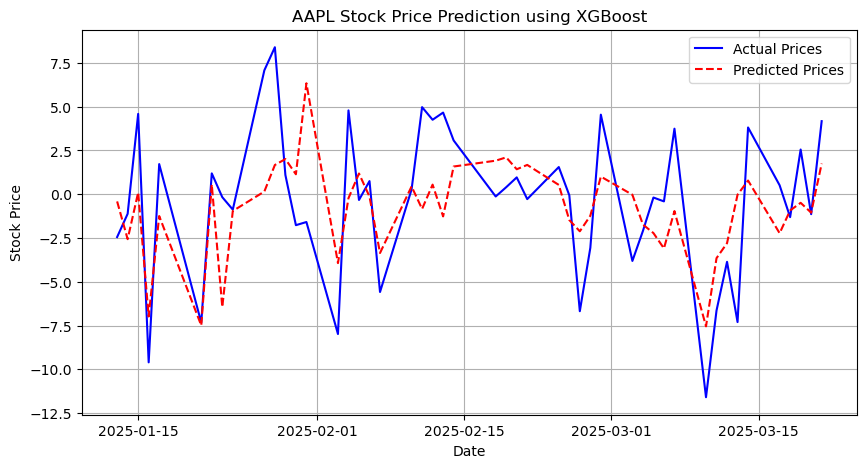

In [135]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
best_params = study.best_params
final_model = xgb.XGBRegressor(**best_params)
final_model.fit(X_train, y_train)

# Make predictions
predictions = final_model.predict(X_test)

# Evaluate performance
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"AAPL - XGBoost MAE: {mae:.4f}, RMSE: {rmse:.4f}, R2 SCORE: {r2:.4f}")

# Plot Actual vs Predicted Prices
plt.figure(figsize=(10, 5))
plt.plot(y_test.index, y_test, label='Actual Prices', color='blue')
plt.plot(y_test.index, predictions, label='Predicted Prices', color='red', linestyle='dashed')
plt.legend()
plt.title("AAPL Stock Price Prediction using XGBoost")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.grid(True)
plt.show()